In [21]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
np.random.seed(42)

In [23]:
df=pd.read_csv('uber.csv')
df.info()
df.shape
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
5,44470845,2011-02-12 02:27:09.0000006,4.9,2011-02-12 02:27:09 UTC,-73.969019,40.755910,-73.969019,40.755910,1
6,48725865,2014-10-12 07:04:00.0000002,24.5,2014-10-12 07:04:00 UTC,-73.961447,40.693965,-73.871195,40.774297,5
7,44195482,2012-12-11 13:52:00.00000029,2.5,2012-12-11 13:52:00 UTC,0.000000,0.000000,0.000000,0.000000,1
8,15822268,2012-02-17 09:32:00.00000043,9.7,2012-02-17 09:32:00 UTC,-73.975187,40.745767,-74.002720,40.743537,1
9,50611056,2012-03-29 19:06:00.000000273,12.5,2012-03-29 19:06:00 UTC,-74.001065,40.741787,-73.963040,40.775012,1


Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64
         Unnamed: 0    fare_amount  pickup_longitude  pickup_latitude  \
count  2.000000e+05  200000.000000     200000.000000    200000.000000   
mean   2.771250e+07      11.359955        -72.527638        39.935885   
std    1.601382e+07       9.901776         11.437787         7.720539   
min    1.000000e+00     -52.000000      -1340.648410       -74.015515   
25%    1.382535e+07       6.000000        -73.992065        40.734796   
50%    2.774550e+07       8.500000        -73.981823        40.752592   
75%    4.155530e+07      12.500000        -73.967154        40.767158   
max    5.542357e+07     499.000000         57.418457      1644.421482   

       dropoff_longitude  dropoff_latitude  passenger_count  
count      199999.000000     199999.000000    200000.000000 

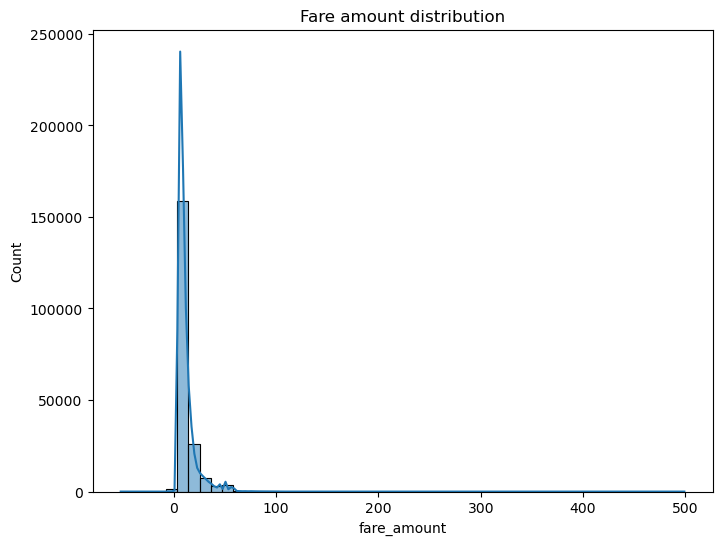

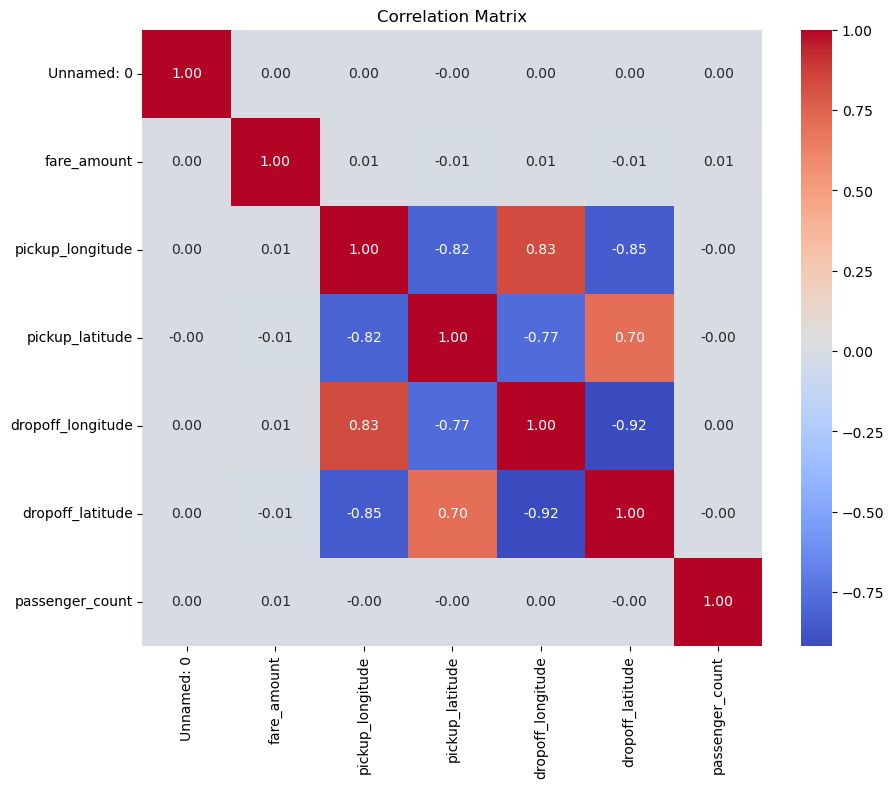

In [25]:
print(df.isnull().sum())
print(df.describe())
plt.figure(figsize=(8,6))
sns.histplot(df['fare_amount'],bins=50,kde=True)
plt.title("Fare amount distribution")
plt.show()
numeric=df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,8))
sns.heatmap(numeric.corr(),annot=True,fmt=".2f",cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [26]:
df=df[df['fare_amount']>0]
df.dropna(subset=['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],inplace=True)
def haversine(lon1,lat1,lon2,lat2):
    lon1,lat1,lon2,lat2=map(np.radians,[lon1,lat1,lon2,lat2])
    dlon=lon2-lon1
    dlat=lat2-lat1
    a=np.sin(dlat/2)**2+np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    c=2*np.arcsin(np.sqrt(a))
    km=6371*c
    return km
df['distance_km']=haversine(df['pickup_longitude'],df['pickup_latitude'],df['dropoff_longitude'],df['dropoff_latitude'])
feature=['passenger_count','distance_km','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']
X=df[feature]
y=df['fare_amount']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)
lr=LinearRegression()
lr.fit(X_train_scaled,y_train)
y_pred=lr.predict(X_test_scaled)
print("Without PCA")
print("R2 ",r2_score(y_test,y_pred))
print("RMSE ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE ",mean_absolute_error(y_test,y_pred))

Without PCA
R2  0.0006149642714874393
RMSE  9.640050597693737
MAE  6.029260762583535


In [29]:
cov_mat=np.cov(X_train_scaled,rowvar=False)
eig_val,eig_vec=np.linalg.eigh(cov_mat)
sorted_index=np.argsort(cov_mat)[::-1]
eig_val=eig_val[sorted_idx]
eig_vec=eig_vec[:,sorted_idx]
ev=eig_val/np.sum(eig_val)
cu=np.cumsum(ev)
n_components=np.argmax(cu>=0.95)+1
W=eig_vec[:, :n_components]
X_train_pca=X_train_scaled.dot(W)
X_test_pca=X_test_scaled.dot(W)
lr_pca=LinearRegression()
lr_pca.fit(X_train_pca,y_train)
y_pred_pca=lr_pca.predict(X_test_pca)
print("With PCA")
print("R2 ",r2_score(y_test,y_pred_pca))
print("RMSE ",np.sqrt(mean_squared_error(y_test,y_pred_pca)))
print("MAE ",mean_absolute_error(y_test,y_pred_pca))

With PCA
R2  0.0006257781131104867
RMSE  9.639998442488949
MAE  6.029104949128945
